In [103]:
import numpy as np
import pandas as pd

In [104]:
df=pd.read_csv('Admission_predict.csv')

In [105]:
print(df.shape)
df.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [106]:
df.info() #to detect missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [107]:
df.duplicated().sum()# To detect duplicate rows

0

In [108]:
df.drop(columns=['Serial No.'],inplace=True)
#inplace means changes done in original df

In [109]:
x=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit '].values
print(x.shape,x.ndim,y.shape,y.ndim)

(500, 7) 2 (500,) 1


In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#for scaling of values
x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)
print(x_train_trf.shape,x_test_trf.shape,y_train.shape,y_train.shape)
print(x_train_trf.ndim,x_test_trf.ndim,y_train.ndim,y_train.ndim)

(400, 7) (100, 7) (400,) (400,)
2 2 1 1


In [112]:
import tensorflow

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [113]:
model=Sequential()
#model.add(): This method adds a layer to theneural network model

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='linear'))


/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156 (624.00 B)

 Trainable params: 156 (624.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [116]:
history = model.fit(x_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1122 - val_loss: 0.0797
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0639 - val_loss: 0.0417
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0352 - val_loss: 0.0270
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0236 - val_loss: 0.0234
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0237 - val_loss: 0.0224
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0232 - val_loss: 0.0216
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0235 - val_loss: 0.0209
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0209 - val_loss: 0.0202
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0207 - val_loss: 0.0193
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 - val_loss: 0.0184
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0192 - val_loss: 0.0176
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0049
Epoch 70/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0049
Epoch 71/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 72/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 73/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 74/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 75/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 76/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0048
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 79/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 80/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 

In [117]:
model.layers[0].get_weights()

[array([[-0.61205524,  0.6144582 , -0.10927199,  0.44858202,  0.22562714,
          0.07922943,  0.06300867],
        [-0.32384747,  0.1896801 ,  0.38863626, -0.18038231,  0.05243472,
          0.7674966 , -0.6247004 ],
        [ 0.15783316, -0.24248137, -0.05654703, -0.14986677,  0.70293254,
         -0.49305132,  0.14475383],
        [-0.1277253 , -0.00945239,  0.29825228,  0.19161253,  0.1431345 ,
          0.79303837,  0.42027578],
        [-0.3031793 , -0.40191954, -0.4863155 ,  0.3102994 , -0.3122927 ,
         -0.26180735,  0.25283796],
        [ 0.44342983, -0.02027652, -0.4197971 , -0.04715026,  0.52790254,
          0.57976454, -0.3415836 ],
        [-0.28510067, -0.07610219,  0.12249349, -0.640163  ,  0.48984817,
         -0.22751157,  0.03831387]], dtype=float32),
 array([ 0.        , -0.04066365,  0.42011666,  0.00697323, -0.06746668,
         0.00564475,  0.06527111], dtype=float32)]

In [118]:
model.layers[1].get_weights()

[array([[-0.29419026,  0.24297523, -0.2742628 , -0.20478177, -0.38540238,
          0.566892  , -0.14378849,  0.51447713,  0.13610041, -0.4461932 ,
          0.05131054],
        [ 0.34892285,  0.46442756, -0.19348979,  0.48313114,  0.1327794 ,
          0.20052904, -0.5310841 ,  0.39056337,  0.40428925,  0.04281239,
          0.51124966],
        [-0.44673026,  0.13268958, -0.19639398, -0.81922287,  0.03891633,
          0.73762405, -0.5448027 , -0.65942943, -0.6139502 , -0.65668494,
         -0.8742948 ],
        [ 0.16344841, -0.2553884 ,  0.3265093 ,  0.18450196, -0.06444338,
          0.28609708, -0.3500182 , -0.2907547 ,  0.05246571, -0.43856654,
          0.5285648 ],
        [ 0.5919385 , -0.52692133,  0.15082975,  0.03362767,  0.21416372,
          0.07732046,  0.17423522,  0.34334093,  0.08527739, -0.36897022,
          0.5343155 ],
        [-0.20552334, -0.46965572, -0.10854934,  0.20511506, -0.09638023,
         -0.14854316, -0.1939121 , -0.17442334,  0.68543124,  0.5854932

In [119]:
model.predict(x_test_trf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[0.6247709 ],
       [0.6680489 ],
       [0.686332  ],
       [0.71011806],
       [0.6586053 ],
       [0.7301671 ],
       [0.9020915 ],
       [0.6483929 ],
       [0.5379035 ],
       [0.71413976],
       [0.643299  ],
       [0.6210847 ],
       [0.4967807 ],
       [0.7826646 ],
       [0.65092486],
       [0.85639274],
       [0.7868537 ],
       [0.67036945],
       [0.7394032 ],
       [0.6550666 ],
       [0.8280306 ],
       [0.6902584 ],
       [0.5921392 ],
       [0.7684946 ],
       [0.6356084 ],
       [0.69460815],
       [0.61218524],
       [0.93113667],
       [0.6336549 ],
       [0.7709369 ],
       [0.7838251 ],
       [0.74158484],
       [0.67863154],
       [0.67985123],
       [0.5838745 ],
       [0.93809444],
       [0.8491228 ],
       [0.8258711 ],
       [0.5938252 ],
       [0.81318426],
       [0.87384135],
       [0.69673693],
       [0.52059025],
       [0.894678  ],
       [0.61335206],
       [0.9444377 ],
       [0.7128884 ],
       [0.908

In [120]:
y_pred=model.predict(x_test_trf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step


In [121]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#accuracy can be improved by following ways


0.8073254895033835

In [122]:
print(history.history)

{'loss': [0.10180725902318954, 0.05325186997652054, 0.030872046947479248, 0.024718541651964188, 0.024007294327020645, 0.023195382207632065, 0.022029934450984, 0.021006545051932335, 0.020139973610639572, 0.019277295097708702, 0.01845952495932579, 0.01764519512653351, 0.016914378851652145, 0.016197610646486282, 0.015464400872588158, 0.01481963973492384, 0.01416091900318861, 0.013534525409340858, 0.012972581200301647, 0.01248882245272398, 0.011991513893008232, 0.011569296941161156, 0.011146621778607368, 0.010773559100925922, 0.010425015352666378, 0.010094879195094109, 0.009802013635635376, 0.00947497133165598, 0.00920801516622305, 0.008929619565606117, 0.00861302763223648, 0.008358570747077465, 0.008093336597084999, 0.007863032631576061, 0.007639081683009863, 0.007475965656340122, 0.007159431464970112, 0.006954129785299301, 0.006744799669831991, 0.0065192594192922115, 0.006280089262872934, 0.006090429611504078, 0.005810472648590803, 0.00557046290487051, 0.005278700031340122, 0.00504195597

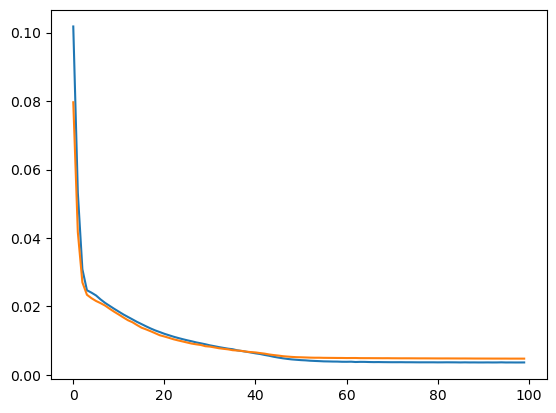

In [123]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])